In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

In [2]:
path = "img/"

images = []
labels = []

for clse in range(1,11):
    ruta = os.path.join(path,str(clse))
    for archivo in os.listdir(ruta): 
        if archivo.endswith(".png"):
            ruta_img = os.path.join(ruta,archivo)
            img = Image.open(ruta_img).convert("L")
            img_array = np.array(img)
            img_flat = img_array.flatten()
            images.append(img_flat)
            labels.append(clse)
            
X = np.array(images)
Y = np.array(labels)

In [3]:
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

#Embedding
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X)

#Embedding PCA
pcaE = PCA(n_components=2)
X_pcaE = pcaE.fit_transform(X_lle)

# Embedding t-SNE
tsneE = TSNE(n_components=2, random_state=42)
X_tsneE = tsne.fit_transform(X_lle)


#Standarization
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)
X_tsne = scaler.fit_transform(X_tsne)
X_pcaE = scaler.fit_transform(X_pcaE)
X_tsneE = scaler.fit_transform(X_tsneE)

KeyboardInterrupt: 

In [ ]:
# Mean-Shift con PCA
bandwidth_pca = estimate_bandwidth(X_pca, quantile=0.2, n_samples=len(X_pca))
ms_pca = MeanShift(bandwidth=bandwidth_pca, bin_seeding=True)
y_ms_pca = ms_pca.fit_predict(X_pca)

# Mean-Shift con t-SNE
bandwidth_tsne = estimate_bandwidth(X_tsne, quantile=0.2, n_samples=len(X_tsne))
ms_tsne = MeanShift(bandwidth=bandwidth_tsne, bin_seeding=True)
y_ms_tsne = ms_tsne.fit_predict(X_tsne)

# Mean-Shift con PCA + Embedding
bandwidth_pcaE = estimate_bandwidth(X_pcaE, quantile=0.2, n_samples=len(X_pcaE))
ms_pcaE = MeanShift(bandwidth=bandwidth_pcaE, bin_seeding=True)
y_ms_pcaE = ms_pca.fit_predict(X_pcaE)

# Mean-Shift con t-SNE + Embedding
bandwidth_tsneE = estimate_bandwidth(X_tsneE, quantile=0.2, n_samples=len(X_tsneE))
ms_tsneE = MeanShift(bandwidth=bandwidth_tsneE, bin_seeding=True)
y_ms_tsneE = ms_tsne.fit_predict(X_tsneE)

In [ ]:
plt.subplot(2, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_ms_pca)
plt.title('Mean-Shift (PCA)')
cluster_labels = [str(i) for i in range(1, 10 + 1)]
for i, label in enumerate(cluster_labels):
    plt.text(X_pca[y_ms_pca == i, 0].mean(), X_pca[y_ms_pca == i, 1].mean(), label,
             horizontalalignment='center', verticalalignment='center', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

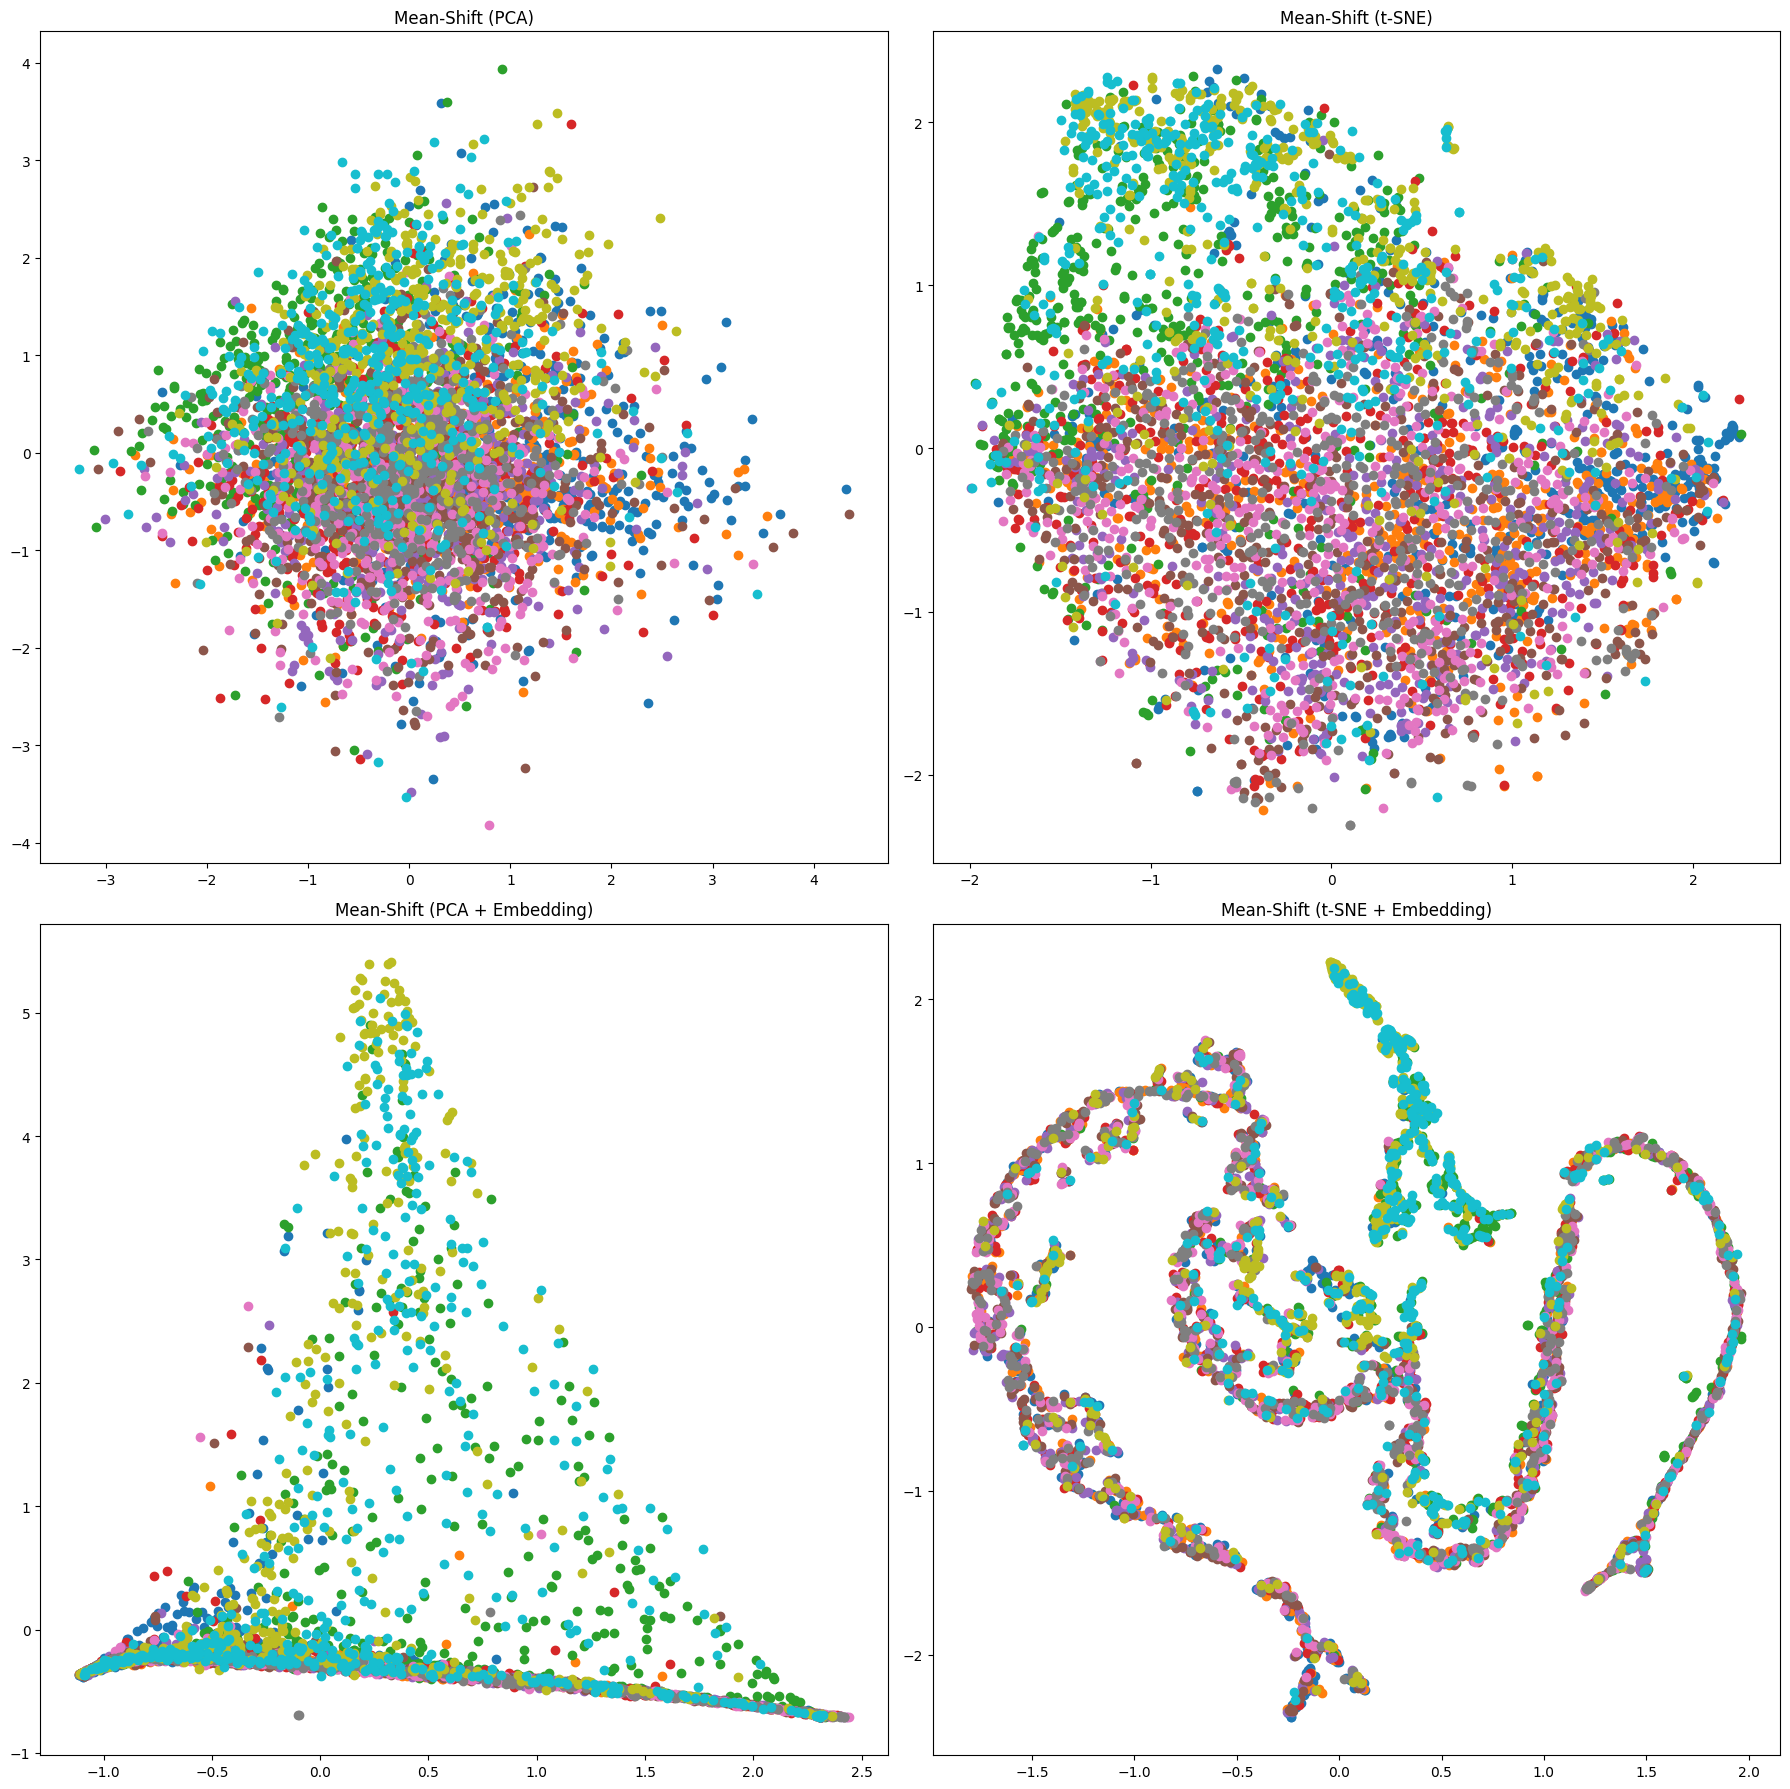

In [ ]:
plt.figure(figsize=(18, 18))

categories = ["","airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck"]

# Plot Mean-Shift with PCA
plt.subplot(2, 2, 1)
for i in np.unique(Y):
    plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], label=f'{categories[i]}')
plt.title('Mean-Shift (PCA)')

# Plot Mean-Shift with t-SNE
plt.subplot(2, 2, 2)
for i in np.unique(Y):
    plt.scatter(X_tsne[Y == i, 0], X_tsne[Y == i, 1], label=f'{categories[i]}')
plt.title('Mean-Shift (t-SNE)')

# Plot Mean-Shift with PCA + Embedding
plt.subplot(2, 2, 3)
for i in np.unique(Y):
        plt.scatter(X_pcaE[Y == i, 0], X_pcaE[Y == i, 1], label=f'{categories[i]}')
plt.title('Mean-Shift (PCA + Embedding)')

# Plot Mean-Shift with t-SNE + Embedding
plt.subplot(2, 2, 4)
for i in np.unique(Y):
    plt.scatter(X_tsneE[Y == i, 0], X_tsneE[Y == i, 1], label=f'{categories[i]}')
plt.title('Mean-Shift (t-SNE + Embedding)')

plt.tight_layout()
plt.show()